In [20]:
# %pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

In [52]:
rnd = np.random
rnd.seed(50)

In [53]:
n = 25  # numbre of clients
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

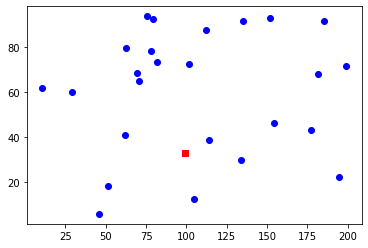

In [54]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [89]:
N = [i for i in range(1, n+1)] #Number of nodes/locations
V = [0] + N                    #Set of vertices
A = [(i, j) for i in V for j in V if i != j] #every possible combination of i and j
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A} #Calculating cost values
Q = 25                #Max capacity
q = {i: rnd.randint(1, 10) for i in N} #Alloting random values for demand to be fulfilled


In [88]:
from gurobipy import Model, GRB, quicksum
sum=0
for (i, j), value in c.items():
    if i == 0:
        sum += value
print(sum)
print(sum())

1540.8800943313


In [90]:
mdl = Model('CVRP')

In [91]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [92]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [93]:
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [94]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 200  # seconds
mdl.optimize()

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 200.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 100 rows, 675 columns and 1300 nonzeros
Model fingerprint: 0x716f3efd
Model has 600 general constraints
Variable types: 25 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+01]
Presolve added 1340 rows and 245 columns
Presolve time: 0.22s
Presolved: 1440 rows, 920 columns, 8993 nonzeros
Variable types: 270 continuous, 650 integer (650 binary)

Root relaxation: objective 5.078688e+02, 101 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth 

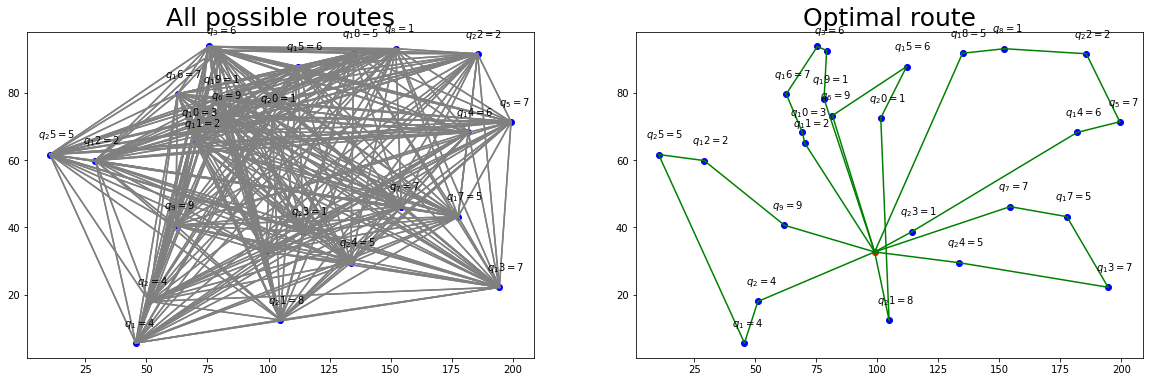

In [95]:
# optimal path -  active paths
active_arcs = [a for a in A if x[a].x > 0.9]

# Visualize / Plotting
f, (ax1,ax2) = plt.subplots(1,2, figsize = (20, 6))
# all possible paths - ax1
ax1.scatter(xc[1:], yc[1:], c = 'b')
ax1.scatter(xc[0], yc[0], c='r')
ax1.set_title('All possible routes', fontsize = 25)

for i in N:
    ax1.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
for i,j in A:
    ax1.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'grey')
    
# Optimal path - ax2
ax2.scatter(xc[1:], yc[1:], c = 'b')
ax2.scatter(xc[0], yc[0], c='r')
ax2.set_title('Optimal route', fontsize = 25)

for i in N:
    ax2.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
for i,j in active_arcs:
    ax2.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
plt.show()

In [96]:
def CVRP():
    
    Q = int(input('Enter capacity of vehicles = ') or 15)
    mdl = Model('CVRP')
    x = mdl.addVars(A, vtype=GRB.BINARY)
    u = mdl.addVars(N, vtype=GRB.CONTINUOUS)
    mdl.modelSense = GRB.MINIMIZE
    mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

    mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
    mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
    mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j]) for i, j in A if i != 0 and j != 0)
    mdl.addConstrs(u[i] >= q[i] for i in N)
    mdl.addConstrs(u[i] <= Q for i in N)

    mdl.Params.MIPGap = 0.05
    mdl.Params.TimeLimit = 100  # seconds
    mdl.optimize()
    # optimal path -  active paths
    active_arcs = [a for a in A if x[a].x > 0.99]

    plt.scatter(xc[1:], yc[1:], c = 'b')
    plt.scatter(xc[0], yc[0], c='r')
    plt.title('Optimal route with %s as max weight'%Q, fontsize = 20)

    for i in N:
        plt.annotate('$q_%d = %d$' % (i,q[i]), (xc[i]-5, yc[i]+5))
    for i,j in active_arcs:
        plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
    plt.show()

Changed value of parameter MIPGap to 0.05
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 100.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 100 rows, 675 columns and 1300 nonzeros
Model fingerprint: 0xb84d59e8
Model has 600 general constraints
Variable types: 25 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 1091 rows and 86 columns
Presolve time: 0.12s
Presolved: 1191 rows, 761 columns, 7705 nonzeros
Variable types: 186 continuous, 575 integer (575 binary)
Found heuristic solution: objective 3081.7601887

Root relaxation: objective 6.574750e+02, 171 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective B

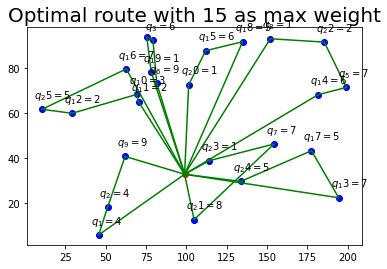

In [97]:
CVRP()

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 100.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 60 rows, 255 columns and 480 nonzeros
Model fingerprint: 0xf0d44482
Model has 210 general constraints
Variable types: 15 continuous, 240 integer (240 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Presolve added 389 rows and 52 columns
Presolve time: 0.05s
Presolved: 449 rows, 307 columns, 3108 nonzeros
Variable types: 67 continuous, 240 integer (240 binary)
Found heuristic solution: objective 2460.2557404

Root relaxation: objective 4.407414e+02, 55 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds  

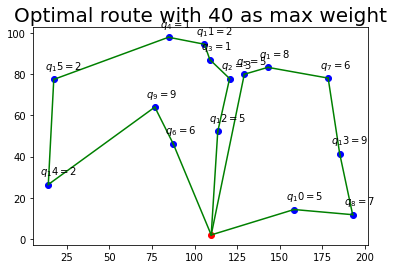

In [34]:
CVRP()